In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from datetime import datetime
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
df = pd.read_json(r'C:\Users\HP\Desktop\8 Projects\Fruad Detection\Dataset\transactions.txt', lines=True)

In [3]:
df

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.00,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.00,,,,False,,,False,False
1,737265056,737265056,5000,5000.00,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,True,,,False,False
2,737265056,737265056,5000,5000.00,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
3,737265056,737265056,5000,5000.00,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.00,,,,False,,,False,False
4,830329091,830329091,5000,5000.00,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.00,,,,True,,,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False


In [4]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [5]:
df.tail()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
786358,732852505,732852505,50000,48904.96,2016-12-22T18:44:12,119.92,Lyft,US,US,90,01,rideshare,12/2022,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1095.04,,,,False,,,False,False
786359,732852505,732852505,50000,48785.04,2016-12-25T16:20:34,18.89,hulu.com,US,US,09,01,online_subscriptions,08/2023,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1214.96,,,,False,,,False,False
786360,732852505,732852505,50000,48766.15,2016-12-27T15:46:24,49.43,Lyft,US,US,02,01,rideshare,08/2025,2012-08-23,2012-08-23,936,936,3783,PURCHASE,,1233.85,,,,False,,,False,False
786361,732852505,732852505,50000,48716.72,2016-12-29T00:30:55,49.89,walmart.com,US,US,09,99,online_retail,07/2022,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1283.28,,,,False,,,False,False
786362,732852505,732852505,50000,48666.83,2016-12-30T20:10:29,72.18,Uber,US,US,05,01,rideshare,05/2024,2012-08-23,2012-08-23,939,939,3388,PURCHASE,,1333.17,,,,False,,,False,False


In [6]:
df.shape

(786363, 29)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 29 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   accountNumber             786363 non-null  int64  
 1   customerId                786363 non-null  int64  
 2   creditLimit               786363 non-null  int64  
 3   availableMoney            786363 non-null  float64
 4   transactionDateTime       786363 non-null  object 
 5   transactionAmount         786363 non-null  float64
 6   merchantName              786363 non-null  object 
 7   acqCountry                786363 non-null  object 
 8   merchantCountryCode       786363 non-null  object 
 9   posEntryMode              786363 non-null  object 
 10  posConditionCode          786363 non-null  object 
 11  merchantCategoryCode      786363 non-null  object 
 12  currentExpDate            786363 non-null  object 
 13  accountOpenDate           786363 non-null  o

In [8]:
df.isnull().sum()

accountNumber               0
customerId                  0
creditLimit                 0
availableMoney              0
transactionDateTime         0
transactionAmount           0
merchantName                0
acqCountry                  0
merchantCountryCode         0
posEntryMode                0
posConditionCode            0
merchantCategoryCode        0
currentExpDate              0
accountOpenDate             0
dateOfLastAddressChange     0
cardCVV                     0
enteredCVV                  0
cardLast4Digits             0
transactionType             0
echoBuffer                  0
currentBalance              0
merchantCity                0
merchantState               0
merchantZip                 0
cardPresent                 0
posOnPremises               0
recurringAuthInd            0
expirationDateKeyInMatch    0
isFraud                     0
dtype: int64

In [9]:
df.duplicated().sum()

0

In [10]:
df.describe()

,accountNumber,customerId,creditLimit,availableMoney,transactionAmount,cardCVV,enteredCVV,cardLast4Digits,currentBalance
count,7.863630e+05,7.863630e+05,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000,786363.000000
mean,5.372326e+08,5.372326e+08,10759.464459,6250.725369,136.985791,544.467338,544.183857,4757.417799,4508.739089
std,2.554211e+08,2.554211e+08,11636.174890,8880.783989,147.725569,261.524220,261.551254,2996.583810,6457.442068
min,1.000881e+08,1.000881e+08,250.000000,-1005.630000,0.000000,100.000000,0.000000,0.000000,0.000000
25%,3.301333e+08,3.301333e+08,5000.000000,1077.420000,33.650000,310.000000,310.000000,2178.000000,689.910000
50%,5.074561e+08,5.074561e+08,7500.000000,3184.860000,87.900000,535.000000,535.000000,4733.000000,2451.760000
75%,7.676200e+08,7.676200e+08,15000.000000,7500.000000,191.480000,785.000000,785.000000,7338.000000,5291.095000
max,9.993896e+08,9.993896e+08,50000.000000,50000.000000,2011.540000,998.000000,998.000000,9998.000000,47498.810000


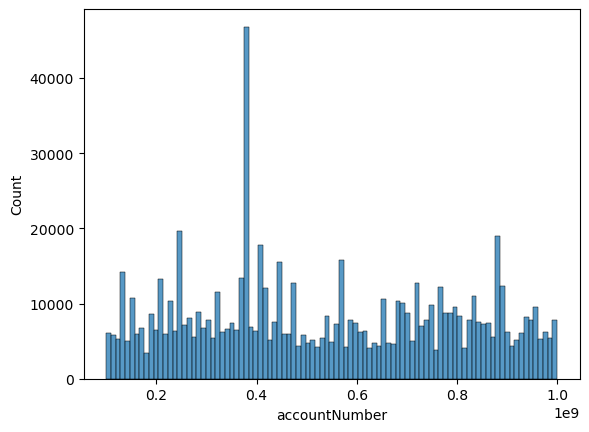

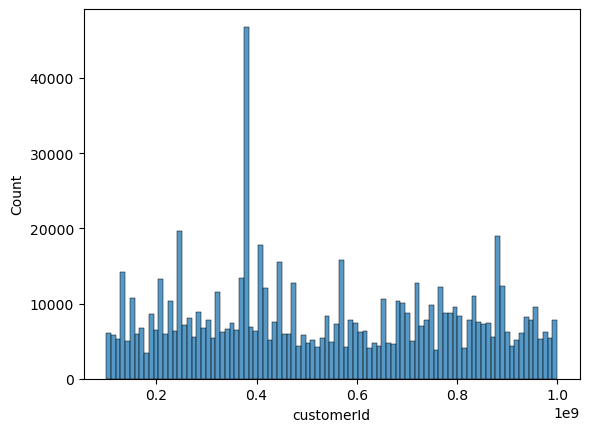

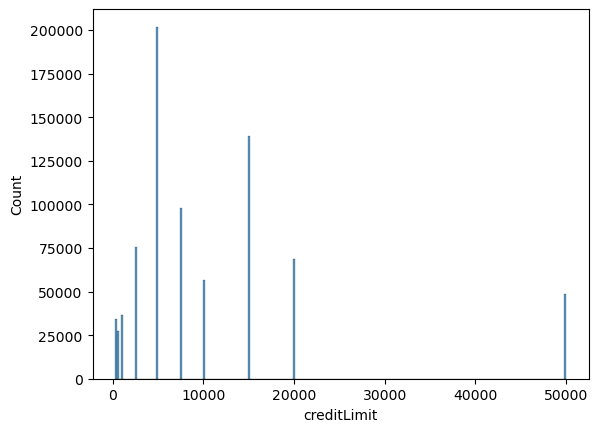

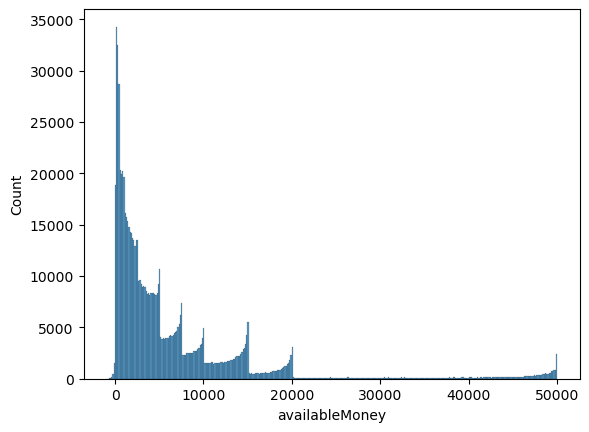

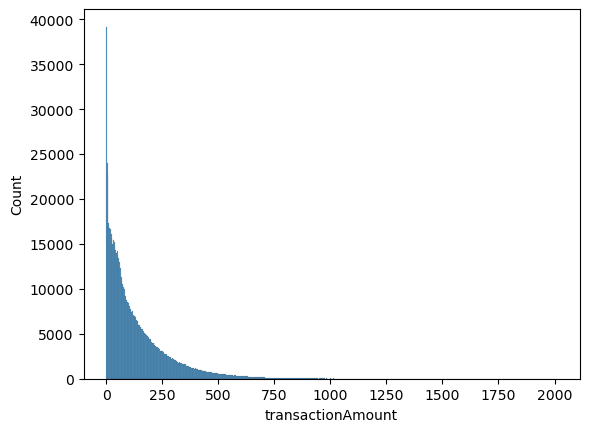

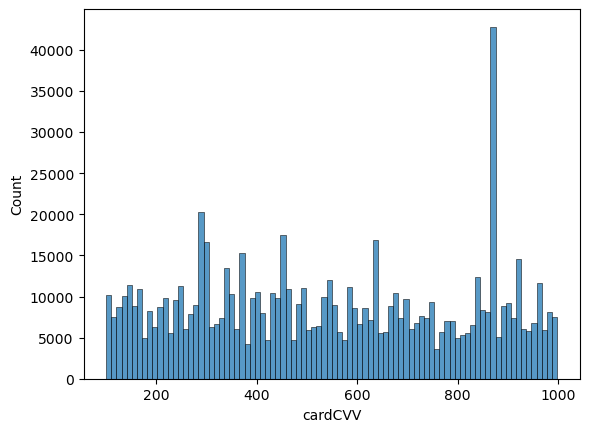

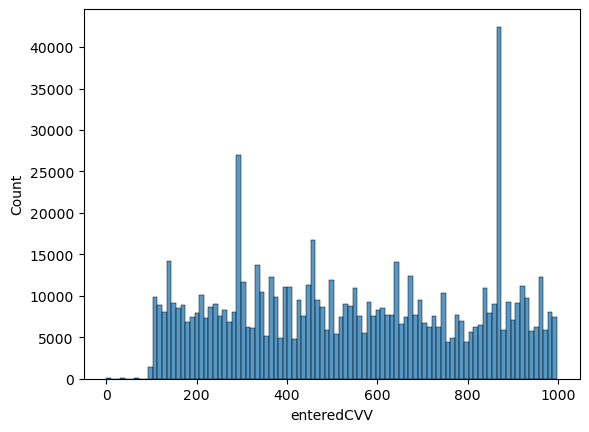

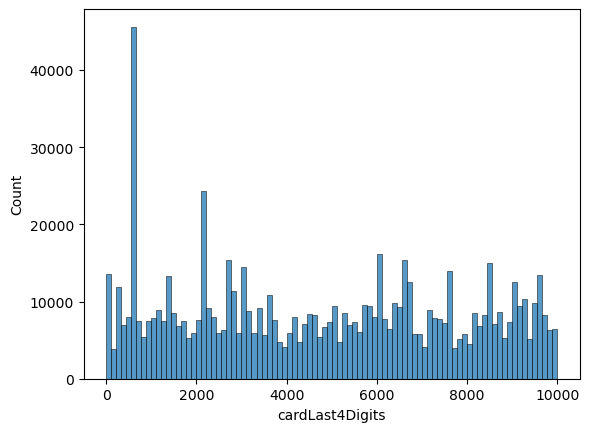

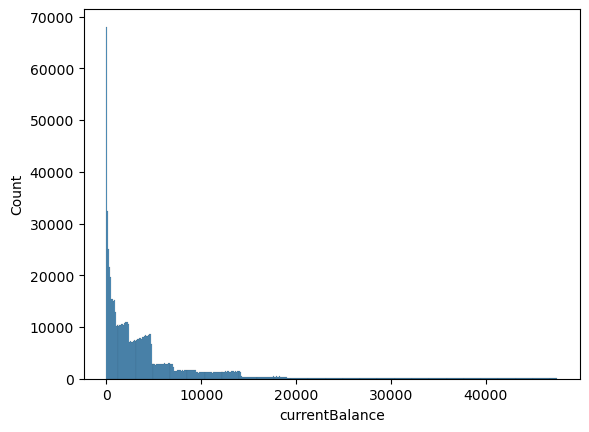

In [11]:
for i in df.select_dtypes(include='number').columns:
    sns.histplot(data=df, x = i)
    plt.show()

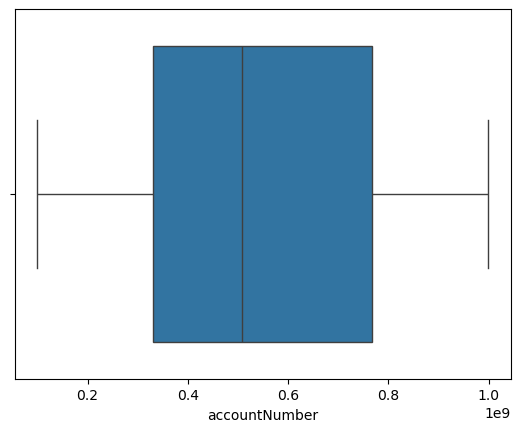

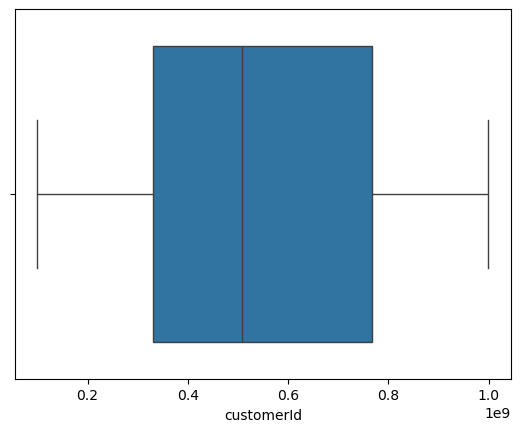

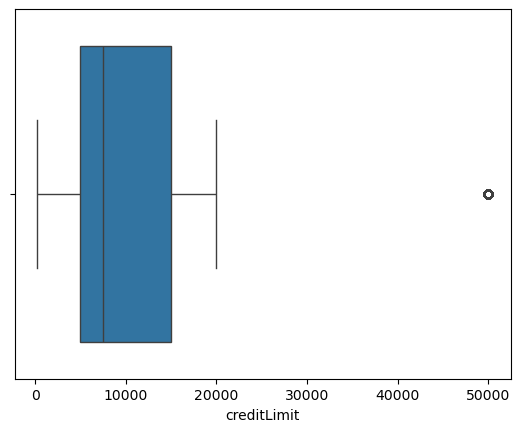

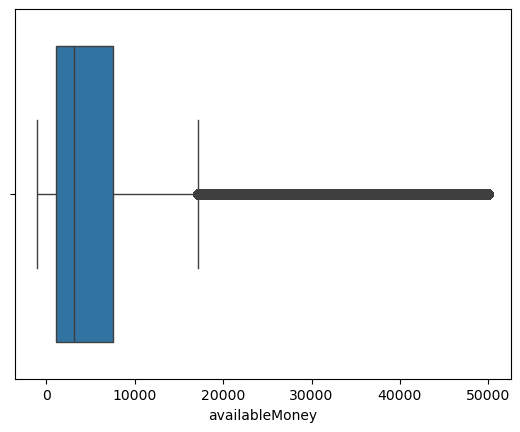

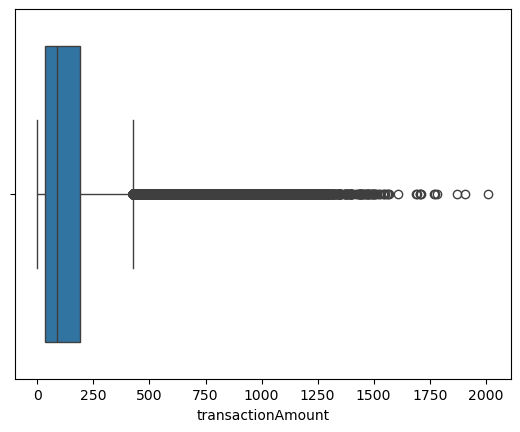

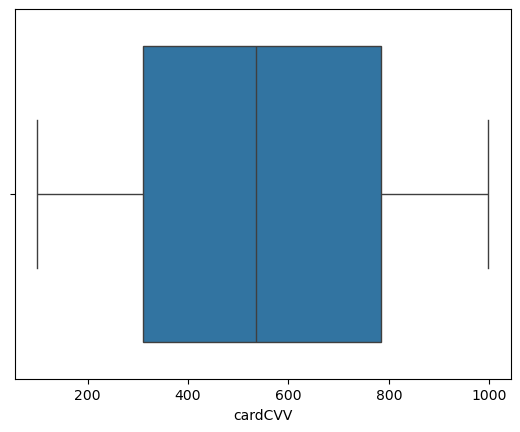

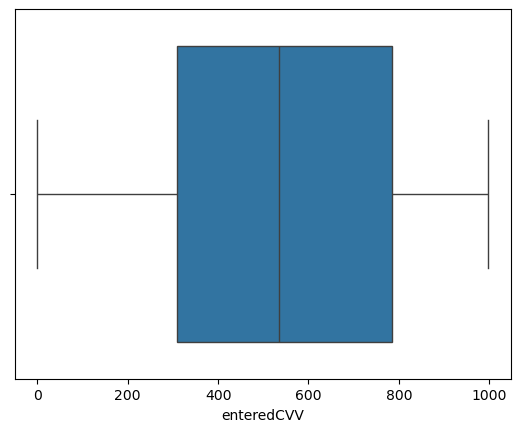

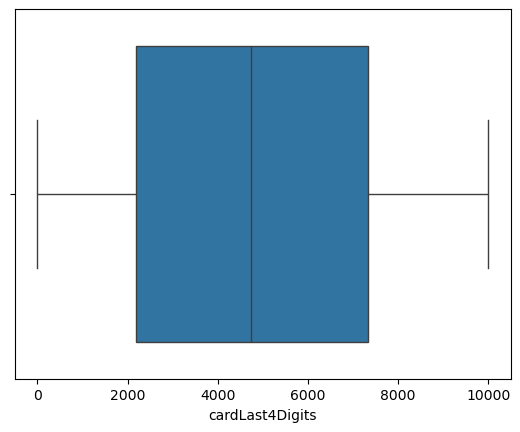

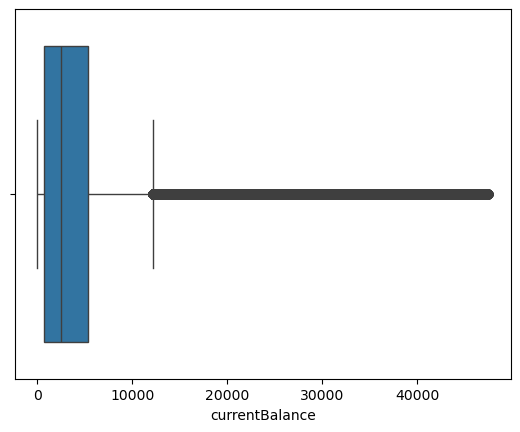

In [12]:
for i in df.select_dtypes(include='number').columns:
    sns.boxplot(data=df, x = i)
    plt.show()

In [13]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,echoBuffer,currentBalance,merchantCity,merchantState,merchantZip,cardPresent,posOnPremises,recurringAuthInd,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,,0.0,,,,False,,,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,True,,,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,,0.0,,,,False,,,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,,0.0,,,,True,,,False,False


In [14]:
df.echoBuffer.value_counts()

echoBuffer
    786363
Name: count, dtype: int64

In [15]:
df.echoBuffer[0]

''

In [16]:
df.merchantCity.value_counts()

merchantCity
    786363
Name: count, dtype: int64

In [17]:
df.merchantCity[0]

''

In [18]:
df.merchantState.value_counts()

merchantState
    786363
Name: count, dtype: int64

In [19]:
df.merchantState[0]

''

In [20]:
df.merchantZip.value_counts()

merchantZip
    786363
Name: count, dtype: int64

In [21]:
df.merchantZip[0]

''

In [22]:
df.posOnPremises.value_counts()

posOnPremises
    786363
Name: count, dtype: int64

In [23]:
df.posOnPremises[0]

''

In [24]:
df.recurringAuthInd.value_counts()

recurringAuthInd
    786363
Name: count, dtype: int64

In [25]:
df.recurringAuthInd[0]

''

In [26]:
df.drop(columns=['echoBuffer', 'merchantCity', 'merchantState', 'merchantZip', 'posOnPremises', 'recurringAuthInd'], axis=1, inplace=True)

In [27]:
df.shape

(786363, 23)

In [28]:
df.head()

,accountNumber,customerId,creditLimit,availableMoney,transactionDateTime,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,currentExpDate,accountOpenDate,dateOfLastAddressChange,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,isFraud
0,737265056,737265056,5000,5000.0,2016-08-13T14:27:32,98.55,Uber,US,US,02,01,rideshare,06/2023,2015-03-14,2015-03-14,414,414,1803,PURCHASE,0.0,False,False,False
1,737265056,737265056,5000,5000.0,2016-10-11T05:05:54,74.51,AMC #191138,US,US,09,01,entertainment,02/2024,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,True,False,False
2,737265056,737265056,5000,5000.0,2016-11-08T09:18:39,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
3,737265056,737265056,5000,5000.0,2016-12-10T02:14:50,7.47,Play Store,US,US,09,01,mobileapps,08/2025,2015-03-14,2015-03-14,486,486,767,PURCHASE,0.0,False,False,False
4,830329091,830329091,5000,5000.0,2016-03-24T21:04:46,71.18,Tim Hortons #947751,US,US,02,01,fastfood,10/2029,2015-08-06,2015-08-06,885,885,3143,PURCHASE,0.0,True,False,False


In [29]:
df.drop(columns=['accountNumber', 'customerId'], axis=1, inplace=True)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 786363 entries, 0 to 786362
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   creditLimit               786363 non-null  int64  
 1   availableMoney            786363 non-null  float64
 2   transactionDateTime       786363 non-null  object 
 3   transactionAmount         786363 non-null  float64
 4   merchantName              786363 non-null  object 
 5   acqCountry                786363 non-null  object 
 6   merchantCountryCode       786363 non-null  object 
 7   posEntryMode              786363 non-null  object 
 8   posConditionCode          786363 non-null  object 
 9   merchantCategoryCode      786363 non-null  object 
 10  currentExpDate            786363 non-null  object 
 11  accountOpenDate           786363 non-null  object 
 12  dateOfLastAddressChange   786363 non-null  object 
 13  cardCVV                   786363 non-null  i

In [31]:
df.acqCountry.value_counts()

acqCountry
US     774709
         4562
MEX      3130
CAN      2424
PR       1538
Name: count, dtype: int64

In [32]:
df.acqCountry.unique()

array(['US', '', 'CAN', 'MEX', 'PR'], dtype=object)

In [33]:
df.merchantCountryCode.value_counts()

merchantCountryCode
US     778511
MEX      3143
CAN      2426
PR       1559
          724
Name: count, dtype: int64

In [34]:
df.merchantCountryCode.unique()

array(['US', 'CAN', '', 'PR', 'MEX'], dtype=object)

In [35]:
df.posEntryMode.value_counts()

posEntryMode
05    315035
09    236481
02    195934
90     19576
80     15283
        4054
Name: count, dtype: int64

In [36]:
df.posEntryMode.unique()

array(['02', '09', '05', '80', '90', ''], dtype=object)

In [37]:
df.posConditionCode.value_counts()

posConditionCode
01    628787
08    149634
99      7533
         409
Name: count, dtype: int64

In [38]:
df.posConditionCode.unique()

array(['01', '08', '99', ''], dtype=object)

In [39]:
df.merchantCategoryCode.value_counts()

merchantCategoryCode
online_retail           202156
fastfood                112138
entertainment            80098
food                     75490
online_gifts             66238
rideshare                51136
hotels                   34097
fuel                     23910
subscriptions            22901
auto                     21651
health                   19092
personal care            18964
airline                  15412
mobileapps               14990
online_subscriptions     11067
furniture                 7432
food_delivery             6000
gym                       2209
cable/phone               1382
Name: count, dtype: int64

In [40]:
df.merchantCategoryCode.unique()

array(['rideshare', 'entertainment', 'mobileapps', 'fastfood',
       'food_delivery', 'auto', 'online_retail', 'gym', 'health',
       'personal care', 'food', 'fuel', 'online_subscriptions',
       'online_gifts', 'hotels', 'airline', 'furniture', 'subscriptions',
       'cable/phone'], dtype=object)

In [41]:
df.transactionType.value_counts()

transactionType
PURCHASE                745193
REVERSAL                 20303
ADDRESS_VERIFICATION     20169
                           698
Name: count, dtype: int64

In [42]:
df.transactionType.unique()

array(['PURCHASE', 'ADDRESS_VERIFICATION', 'REVERSAL', ''], dtype=object)

In [43]:
df.cardPresent.value_counts()

cardPresent
False    433495
True     352868
Name: count, dtype: int64

In [44]:
df.expirationDateKeyInMatch.value_counts()

expirationDateKeyInMatch
False    785320
True       1043
Name: count, dtype: int64

In [45]:
df.isFraud.value_counts()

isFraud
False    773946
True      12417
Name: count, dtype: int64

### Removing Garbage Values

In [47]:
columns= ['transactionType','posConditionCode','posEntryMode','merchantCountryCode','acqCountry']

In [48]:
# Remove rows with empty strings in the transactionType column
for i in columns:
    df = df[df[i].str.strip()!='']

In [49]:
df.merchantName.value_counts()

merchantName
Uber                             25292
Lyft                             25218
oldnavy.com                      16790
staples.com                      16775
alibaba.com                      16764
                                 ...  
Sprint Communications #561941        2
Runners #383214                      2
EZ Wireless #149871                  1
Curves #849125                       1
TMobile Wireless #602341             1
Name: count, Length: 2489, dtype: int64

### Encoding all categorical column

In [51]:
encode_columns = ['merchantName', 'acqCountry', 'merchantCountryCode', 'posEntryMode', 'posConditionCode', 'merchantCategoryCode', 'transactionType']

In [52]:
for i in encode_columns:
    l_encoder = LabelEncoder()
    df[i] = l_encoder.fit_transform(df[i])

### Converting all datetime column to datetime format

In [54]:
df['transactionDateTime'] = pd.to_datetime(df['transactionDateTime'])
# df['currentExpDate'] = pd.to_datetime(df['currentExpDate'])
df['accountOpenDate'] = pd.to_datetime(df['accountOpenDate'])
df['dateOfLastAddressChange'] = pd.to_datetime(df['dateOfLastAddressChange'])

### Fixing dateOfLastAddressChange column 

In [56]:
df['daysSinceLastAddressChange'] = (df['transactionDateTime'] - df['dateOfLastAddressChange']).dt.days

In [57]:
df.shape

(776668, 22)

### Fixing transactionDateTime column

In [59]:
df['transactionHour'] = df['transactionDateTime'].dt.hour  # Extract hour of the transaction
df['transactionDayOfWeek'] = df['transactionDateTime'].dt.dayofweek  # Extract day of the week (0=Monday, 6=Sunday)

In [60]:
df.shape

(776668, 24)

### Fixing accountOpenDate column

In [62]:
df['accountAgeDays'] = (df['transactionDateTime'] - df['accountOpenDate']).dt.days  # Days since account creation

In [63]:
df.shape

(776668, 25)

### Fixing currentExpDate column

In [65]:
df['expMonth'] = df['currentExpDate'].str.split('/').str[0].astype(int)
df['expYear'] = df['currentExpDate'].str.split('/').str[1].astype(int) + 2000  # Convert YY to YYYY

In [66]:
df['monthsToExpiry'] = (df['expYear'] - df['transactionDateTime'].dt.year) * 12 + (df['expMonth'] - df['transactionDateTime'].dt.month)

In [67]:
df.shape

(776668, 28)

### Droping transactionDateTime, currentExpDate, accountOpenDate, dateOfLastAddressChange

In [69]:
df.drop(columns=['transactionDateTime', 'currentExpDate', 'accountOpenDate', 'dateOfLastAddressChange'], axis = 1, inplace=True)

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 776668 entries, 0 to 786362
Data columns (total 24 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   creditLimit                 776668 non-null  int64  
 1   availableMoney              776668 non-null  float64
 2   transactionAmount           776668 non-null  float64
 3   merchantName                776668 non-null  int32  
 4   acqCountry                  776668 non-null  int32  
 5   merchantCountryCode         776668 non-null  int32  
 6   posEntryMode                776668 non-null  int32  
 7   posConditionCode            776668 non-null  int32  
 8   merchantCategoryCode        776668 non-null  int32  
 9   cardCVV                     776668 non-null  int64  
 10  enteredCVV                  776668 non-null  int64  
 11  cardLast4Digits             776668 non-null  int64  
 12  transactionType             776668 non-null  int32  
 13  currentBalance     

### Applying SMOTE (Synthetic Minority Oversampling Technique) to balance the isFraud column 

In [72]:
X = df.drop('isFraud', axis = 1)
y = df['isFraud']

In [73]:
X.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionHour,transactionDayOfWeek,accountAgeDays,expMonth,expYear,monthsToExpiry
0,5000,5000.0,98.55,2085,3,3,0,0,17,414,414,1803,1,0.0,False,False,518,14,5,518,6,4023,24082
1,5000,5000.0,74.51,27,3,3,2,0,3,486,486,767,1,0.0,True,False,577,5,1,577,2,4024,24088
2,5000,5000.0,7.47,1304,3,3,2,0,12,486,486,767,1,0.0,False,False,605,9,1,605,8,4025,24105
3,5000,5000.0,7.47,1304,3,3,2,0,12,486,486,767,1,0.0,False,False,637,2,5,637,8,4025,24104
4,5000,5000.0,71.18,2083,3,3,0,0,4,885,885,3143,1,0.0,True,False,231,21,3,231,10,4029,24163


In [74]:
y

0         False
1         False
2         False
3         False
4         False
          ...  
786358    False
786359    False
786360    False
786361    False
786362    False
Name: isFraud, Length: 776668, dtype: bool

In [75]:
X.shape

(776668, 23)

In [76]:
y.shape

(776668,)

In [77]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [78]:
X_resampled.shape

(1529404, 23)

In [79]:
y_resampled.shape

(1529404,)

In [80]:
print("Class distribution before SMOTE:", y.value_counts())
print("Class distribution after SMOTE:", pd.Series(y_resampled).value_counts())

Class distribution before SMOTE: isFraud
False    764702
True      11966
Name: count, dtype: int64
Class distribution after SMOTE: isFraud
False    764702
True     764702
Name: count, dtype: int64


## Spliting Data inot Train Test Split

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3)

# Feature Scaling

In [84]:
scaler = MinMaxScaler()

In [85]:
X_train_scaled = scaler.fit_transform(X_train)

In [86]:
X_test_scaled = scaler.transform(X_test)

In [87]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [88]:
X_train.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionHour,transactionDayOfWeek,accountAgeDays,expMonth,expYear,monthsToExpiry
0,0.195980,0.146835,0.044308,0.889469,1.0,1.0,0.25,0.0,0.388889,0.402004,0.461924,0.160432,0.5,0.074028,1.0,0.0,0.036637,0.565217,0.333333,0.036540,0.636364,0.928571,0.891429
1,0.296482,0.120605,0.031757,0.689309,1.0,1.0,0.25,0.0,0.222222,0.479955,0.532064,0.621124,0.5,0.207460,1.0,0.0,0.016216,0.826087,0.833333,0.016118,0.545455,0.428571,0.445714
2,0.296482,0.066479,0.047307,0.940916,1.0,1.0,0.50,0.0,1.000000,0.273942,0.346693,0.667534,0.5,0.265582,0.0,0.0,0.000200,0.869565,0.333333,0.071979,0.454545,0.857143,0.828571
3,1.000000,0.696366,0.144382,0.063505,1.0,1.0,0.25,0.0,0.722222,0.136971,0.223447,0.260052,0.5,0.326051,0.0,0.0,0.072272,0.739130,1.000000,0.072179,0.636364,0.714286,0.674286
4,0.000000,0.020563,0.024916,0.013264,1.0,1.0,0.25,0.0,0.166667,0.387528,0.448898,0.438588,0.5,0.004354,1.0,0.0,0.001401,0.739130,0.666667,0.038142,0.636364,0.642857,0.594286


In [89]:
X_test.head()

,creditLimit,availableMoney,transactionAmount,merchantName,acqCountry,merchantCountryCode,posEntryMode,posConditionCode,merchantCategoryCode,cardCVV,enteredCVV,cardLast4Digits,transactionType,currentBalance,cardPresent,expirationDateKeyInMatch,daysSinceLastAddressChange,transactionHour,transactionDayOfWeek,accountAgeDays,expMonth,expYear,monthsToExpiry
0,0.095477,0.104307,0.087472,0.997588,1.0,1.0,0.25,0.0,0.777778,0.259465,0.333667,0.021104,0.5,0.014430,0.0,0.0,0.002803,0.695652,0.833333,0.044749,0.000000,0.714286,0.720000
1,0.195980,0.214197,0.010455,0.993971,1.0,1.0,0.25,0.0,0.777778,0.298441,0.368737,0.637027,0.5,0.001692,0.0,0.0,0.042543,0.347826,0.333333,0.042447,1.000000,0.071429,0.085714
2,0.396985,0.406418,0.123855,0.901527,1.0,1.0,0.00,0.0,0.833333,0.528953,0.576152,0.842769,0.5,0.005811,0.0,0.0,0.015115,0.217391,0.000000,0.041345,0.363636,0.500000,0.502857
3,0.195980,0.201881,0.083833,0.182074,1.0,1.0,0.50,0.0,0.722222,0.241648,0.317635,0.815963,0.5,0.014917,0.0,0.0,0.088789,0.739130,0.666667,0.088698,0.363636,0.142857,0.188571
4,0.145729,0.121388,0.050869,0.969453,1.0,1.0,0.25,0.0,0.666667,0.440980,0.496994,0.035807,0.5,0.048720,0.0,0.0,0.040140,0.217391,0.333333,0.072580,0.818182,0.357143,0.405714


# Model Building

### Logistic Regression

In [92]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

LogisticRegression()

In [93]:
y_pred = logistic_model.predict(X_test)
y_pred

array([ True, False,  True, ..., False, False,  True])

In [94]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

In [95]:
print(accuracy)

0.7773232321030814


In [96]:
print(conf_matrix)

[[179699  49897]
 [ 52272 176954]]


In [97]:
print(class_report)

              precision    recall  f1-score   support

       False       0.77      0.78      0.78    229596
        True       0.78      0.77      0.78    229226

    accuracy                           0.78    458822
   macro avg       0.78      0.78      0.78    458822
weighted avg       0.78      0.78      0.78    458822



# SVM (Support Vector Machine)

In [99]:
# Define the SVM model
svm = SVC()

In [100]:
# Define the hyperparameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
}

In [ ]:
# Perform Grid Search with Cross-Validation
grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy' )
grid_search.fit(X_train, y_train)

### Check Overfitting and Underfitting

In [ ]:
logistic_model.score(X_train, y_train)

In [ ]:
logistic_model.score(X_test, y_test)

In [ ]:
# isFraud
# False    764702
# True     764702
# Name: count, dtype: int64
# 1070582 